# EDA on Flight Price Prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:
# Extra step for importing file in google collb,skip if is in jupyter notebook.

from google.colab import files

uploaded = files.upload()

Saving flight_price.xlsx to flight_price.xlsx


In [4]:
df = pd.read_excel('flight_price.xlsx')

In [116]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [118]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
# Let's convert date_of journey into numerical features so ML model can understand

df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [6]:
# But day,month and year are in string format, we need to convert them into numericals

type(df['Date_of_Journey'].str.split('/').str[0])

pandas.core.series.Series

In [7]:
type(df['Date_of_Journey'].str.split('/').str[0][0] )

str

In [8]:
# To convert string into integers

df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [124]:
type(df['Date'][0])

numpy.int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [9]:
# We can drop Data of Journey column as now no use.

df.drop('Date_of_Journey', axis= 1, inplace= True)

In [10]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Month',
       'Year'],
      dtype='object')

Perform same operation on other columns.

# Arrival Column

In [11]:
# Here we need to separate time from the date
df['Arrival_Time'].str.split(' ').str[0]

,Arrival_Time
0,01:10
1,13:15
2,04:25
3,23:30
4,21:35
...,...
10678,22:25
10679,23:20
10680,11:20
10681,14:10


In [165]:
# Here we need to separate hours from the time
type(df['Arrival_Time'].str.split(' ').str[0][0])

str

In [12]:
df['Arrival_hours'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_minutes'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Arrival_hours    10683 non-null  object
 14  Arrival_minutes  10683 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.2+ MB


In [14]:
# To convert them into integers

df['Arrival_hours'] = df['Arrival_hours'].astype(int)
df['Arrival_minutes'] = df['Arrival_minutes'].astype(int)
df.drop('Arrival_Time', axis= 1, inplace= True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_hours    10683 non-null  int64 
 13  Arrival_minutes  10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


# Departure time

In [16]:
# Splitting hours and minutes in Departure time
df['Dep_hours'] = df['Dep_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Dep_minutes'] = df['Dep_Time'].str.split(' ').str[0].str.split(':').str[1]

# To convert them into integers
df['Dep_hours'] = df['Dep_hours'].astype(int)
df['Dep_minutes'] = df['Dep_minutes'].astype(int)

# To remove Dep_Time column as no use now.
df.drop('Dep_Time', axis= 1, inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Arrival_hours    10683 non-null  int64 
 12  Arrival_minutes  10683 non-null  int64 
 13  Dep_hours        10683 non-null  int64 
 14  Dep_minutes      10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [18]:
# We are removing route as it has info from Source and Destination and there are separate columns for these two.
df.drop('Route', axis= 1, inplace= True)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Duration         10683 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Date             10683 non-null  int64 
 8   Month            10683 non-null  int64 
 9   Year             10683 non-null  int64 
 10  Arrival_hours    10683 non-null  int64 
 11  Arrival_minutes  10683 non-null  int64 
 12  Dep_hours        10683 non-null  int64 
 13  Dep_minutes      10683 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.1+ MB


In [138]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hours,Dep_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


# Duration

In [19]:
df['Duration'].str.split(' ').str[0].str.split('h').str[0][1]

'7'

In [20]:
df['Duration'].str.split(' ').str[1].str.split('m').str[0][0]

'50'

In [21]:
# Similar operation for 'Duration' column to separate hours and minutes.
# Also Replace NaN values to 0.

temp_df = df

temp_df['Duration_hours'] = temp_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
temp_df['Duration_minutes'] = temp_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

Replace NaN values with 0:

In [22]:
temp_df['Duration_hours'] = temp_df['Duration_hours'].fillna(0)
temp_df['Duration_minutes'] = temp_df['Duration_minutes'].fillna(0)

In [23]:
temp_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hours,Dep_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45


In [24]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Duration          10683 non-null  object
 4   Total_Stops       10682 non-null  object
 5   Additional_Info   10683 non-null  object
 6   Price             10683 non-null  int64 
 7   Date              10683 non-null  int64 
 8   Month             10683 non-null  int64 
 9   Year              10683 non-null  int64 
 10  Arrival_hours     10683 non-null  int64 
 11  Arrival_minutes   10683 non-null  int64 
 12  Dep_hours         10683 non-null  int64 
 13  Dep_minutes       10683 non-null  int64 
 14  Duration_hours    10683 non-null  object
 15  Duration_minutes  10683 non-null  object
dtypes: int64(8), object(8)
memory usage: 1.3+ MB


In [25]:
temp_df['Duration_hours'] = temp_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

temp_df['Duration_hours'] = temp_df['Duration_hours'].astype(int)


ValueError: invalid literal for int() with base 10: '5m'

In [37]:
temp_df['Duration_hours']

,Duration_hours
0,2
1,7
2,19
3,5
4,4
...,...
10678,2
10679,2
10680,3
10681,2


In [35]:
type( temp_df['Duration_hours'][7] )

str

In [ ]:
index = 0
for hour in temp_df['Duration_hours']:
  print(hour, type(hour))
  if type(hour) != str:
    print("hello pass")
    temp_df['Duration_hours'][index] = str(hour)
    continue
  if 'm' in hour:
    temp_df['Duration_hours'][index] = temp_df['Duration_hours'].str.spli('m')[0][0]

  index = index + 1

In [41]:
temp_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hours,Dep_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45


In [44]:
temp_df['Duration_hours'] = temp_df['Duration_hours'].astype(int)
temp_df['Duration_minutes'] = temp_df['Duration_minutes'].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Duration          10683 non-null  object
 4   Total_Stops       10682 non-null  object
 5   Additional_Info   10683 non-null  object
 6   Price             10683 non-null  int64 
 7   Date              10683 non-null  int64 
 8   Month             10683 non-null  int64 
 9   Year              10683 non-null  int64 
 10  Arrival_hours     10683 non-null  int64 
 11  Arrival_minutes   10683 non-null  int64 
 12  Dep_hours         10683 non-null  int64 
 13  Dep_minutes       10683 non-null  int64 
 14  Duration_hours    10683 non-null  int64 
 15  Duration_minutes  10683 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 1.3+ MB


In [46]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Duration          10683 non-null  object
 4   Total_Stops       10682 non-null  object
 5   Additional_Info   10683 non-null  object
 6   Price             10683 non-null  int64 
 7   Date              10683 non-null  int64 
 8   Month             10683 non-null  int64 
 9   Year              10683 non-null  int64 
 10  Arrival_hours     10683 non-null  int64 
 11  Arrival_minutes   10683 non-null  int64 
 12  Dep_hours         10683 non-null  int64 
 13  Dep_minutes       10683 non-null  int64 
 14  Duration_hours    10683 non-null  int64 
 15  Duration_minutes  10683 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 1.3+ MB


In [47]:
df = temp_df

In [48]:
df.drop('Duration', axis = 1, inplace = True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Total_Stops       10682 non-null  object
 4   Additional_Info   10683 non-null  object
 5   Price             10683 non-null  int64 
 6   Date              10683 non-null  int64 
 7   Month             10683 non-null  int64 
 8   Year              10683 non-null  int64 
 9   Arrival_hours     10683 non-null  int64 
 10  Arrival_minutes   10683 non-null  int64 
 11  Dep_hours         10683 non-null  int64 
 12  Dep_minutes       10683 non-null  int64 
 13  Duration_hours    10683 non-null  int64 
 14  Duration_minutes  10683 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


# Total Stop

1. 'Total stop' is a categorical feature

2.  We can apply Label encoding in this as there are only 5 categories in column.

3. As for NaN values, we can replace them with mode of the data.

In [50]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [51]:
# Step1: Let's find mode first
mode= df['Total_Stops'].mode()
mode

,Total_Stops
0,1 stop


In [52]:
# Step2: Let's do Label Encoding:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4, np.nan:1})


In [53]:
df['Total_Stops'].isnull().sum()

0

In [54]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hours,Dep_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,4,45


# Airlines, Source and Destination columns.

In [55]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

In [56]:
encoder.fit_transform(df[['Airline', 'Source', 'Destination']])

<10683x23 sparse matrix of type '<class 'numpy.float64'>'
	with 32049 stored elements in Compressed Sparse Row format>

In [57]:
encoded_data = encoder.fit_transform(df[['Airline', 'Source', 'Destination']]).toarray()

In [58]:
encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out())

In [59]:
encoded_df

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
new_df= pd.concat([df,encoded_df], axis= 1)

In [61]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline                                    10683 non-null  object 
 1   Source                                     10683 non-null  object 
 2   Destination                                10683 non-null  object 
 3   Total_Stops                                10683 non-null  int64  
 4   Additional_Info                            10683 non-null  object 
 5   Price                                      10683 non-null  int64  
 6   Date                                       10683 non-null  int64  
 7   Month                                      10683 non-null  int64  
 8   Year                                       10683 non-null  int64  
 9   Arrival_hours                              10683 non-null  int64  
 10  Arrival_minutes       

In [62]:
new_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'Arrival_hours', 'Arrival_minutes',
       'Dep_hours', 'Dep_minutes', 'Duration_hours', 'Duration_minutes',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [63]:
# Remove the above above 3 columns:
new_df.drop('Airline', axis= 1, inplace= True)
new_df.drop('Source', axis= 1, inplace= True)
new_df.drop('Destination', axis= 1, inplace= True)

In [64]:
new_df.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'Date', 'Month', 'Year',
       'Arrival_hours', 'Arrival_minutes', 'Dep_hours', 'Dep_minutes',
       'Duration_hours', 'Duration_minutes', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [65]:
df = new_df

In [66]:
df.shape

(10683, 35)

# GRAPHS VISUALIZATION:

In [72]:
df.describe()

,Total_Stops,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hours,Dep_minutes,Duration_hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,...,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,13.348778,24.690630,12.490686,24.411214,10.246560,...,0.035664,0.424693,0.268745,0.065244,0.268745,0.424693,0.118412,0.065244,0.035664,0.087241
std,0.675199,4611.359167,8.479277,1.164357,0.0,6.859125,16.506036,5.748650,18.767980,8.494988,...,0.185460,0.494320,0.443328,0.246967,0.443328,0.494320,0.323111,0.246967,0.185460,0.282202
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,15.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Price', ylabel='Count'>

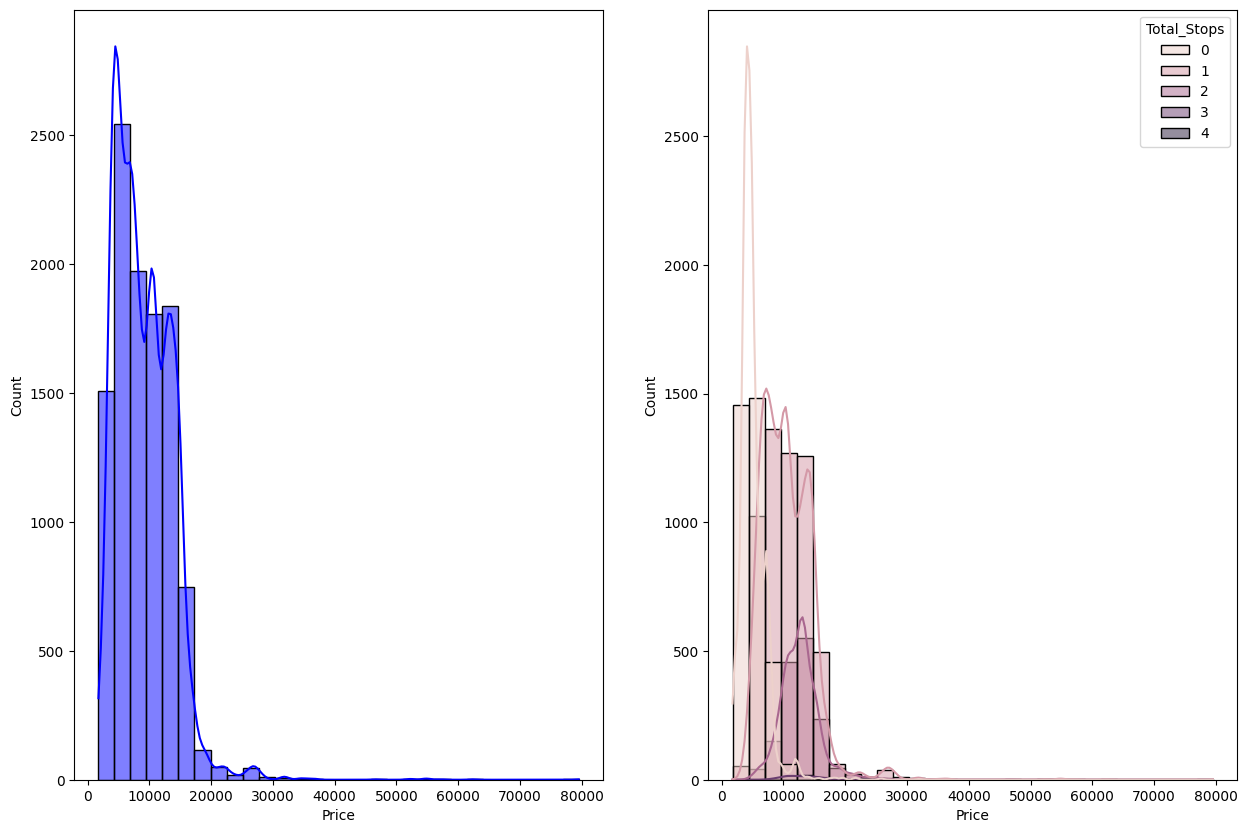

In [88]:
fig,axis = plt.subplots(1,2, figsize = (15, 10))

plt.subplot(121)
sns.histplot(data = df, x = 'Price', bins = 30, kde= True, color = 'b')

plt.subplot(122)
sns.histplot(data = df, x = 'Price', bins = 30, kde= True, hue = 'Total_Stops')

<Axes: xlabel='Price', ylabel='Count'>

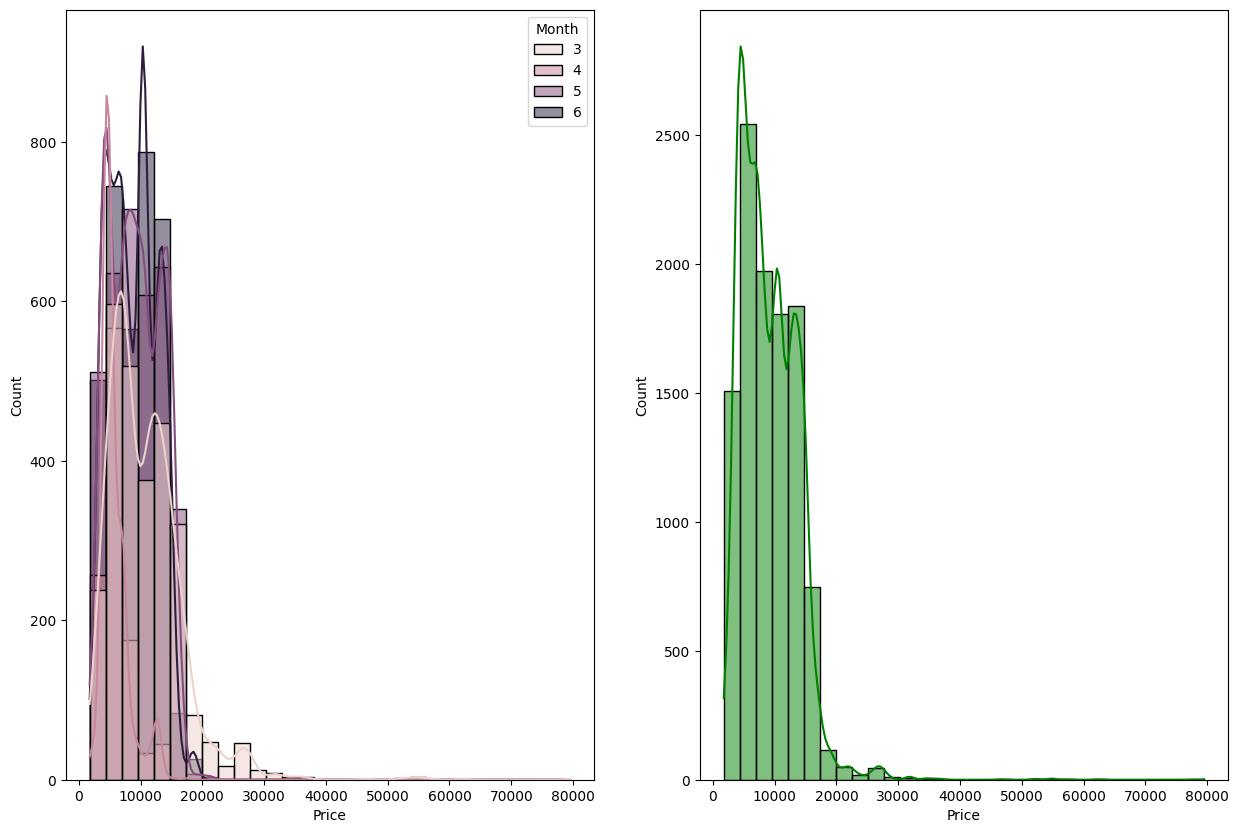

In [90]:
fig,axis = plt.subplots(1,2, figsize = (15, 10))

plt.subplot(121)
sns.histplot(data = df, x = 'Price', bins = 30, kde= True, hue = 'Month')

plt.subplot(122)
sns.histplot(data = df, x = 'Price', bins = 30, kde= True, color = 'g')

In [ ]:
fig,axis = plt.subplots(1,4, figsize = (20, 10))

plt.subplot(121)
sns.histplot(data = df, x = 'Price', kde= True, hue = '')